In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df=pd.read_excel(r"C:\Users\admin\Downloads\sales_data.xlsx")
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [4]:
df.shape

(5000, 40)

In [5]:
df.tail()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.0,207,...,0.0,0.00,0,0,0,1,0.0,0.0,0.00,117.49
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.0,207,...,0.0,0.00,0,0,0,1,0.0,0.0,0.00,117.49
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.0,207,...,0.0,0.00,0,0,0,1,0.0,0.0,0.00,117.49
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.0,207,...,0.0,0.00,0,0,1,0,0.0,0.0,117.49,0.00
4999,200783,2,94.14,47.07,9.94,4.97,2014-06-26,2021-04-01,1235.5,207,...,0.0,49.95,0,0,1,1,0.0,0.0,44.19,49.95


In [6]:
df.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,...,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,...,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,...,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,...,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,...,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,...,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

In [8]:
df.isnull().sum()

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

In [9]:
for i in df.columns:
    print(i,df[i].nunique())

CustomerID 5000
TOTAL_ORDERS 85
REVENUE 4635
AVERAGE_ORDER_VALUE 4113
CARRIAGE_REVENUE 1175
AVERAGESHIPPING 567
FIRST_ORDER_DATE 1928
LATEST_ORDER_DATE 207
AVGDAYSBETWEENORDERS 3563
DAYSSINCELASTORDER 207
MONDAY_ORDERS 19
TUESDAY_ORDERS 22
WEDNESDAY_ORDERS 22
THURSDAY_ORDERS 23
FRIDAY_ORDERS 24
SATURDAY_ORDERS 24
SUNDAY_ORDERS 23
MONDAY_REVENUE 2151
TUESDAY_REVENUE 2201
WEDNESDAY_REVENUE 2262
THURSDAY_REVENUE 2582
FRIDAY_REVENUE 2378
SATURDAY_REVENUE 2149
SUNDAY_REVENUE 2573
WEEK1_DAY01_DAY07_ORDERS 27
WEEK2_DAY08_DAY15_ORDERS 34
WEEK3_DAY16_DAY23_ORDERS 33
WEEK4_DAY24_DAY31_ORDERS 32
WEEK1_DAY01_DAY07_REVENUE 3026
WEEK2_DAY08_DAY15_REVENUE 2900
WEEK3_DAY16_DAY23_REVENUE 2947
WEEK4_DAY24_DAY31_REVENUE 3386
TIME_0000_0600_ORDERS 22
TIME_0601_1200_ORDERS 41
TIME_1200_1800_ORDERS 41
TIME_1801_2359_ORDERS 36
TIME_0000_0600_REVENUE 1413
TIME_0601_1200_REVENUE 3203
TIME_1200_1800_REVENUE 3512
TIME_1801_2359_REVENUE 3128


In [10]:
df1= df[['MONDAY_ORDERS' ,'TUESDAY_ORDERS' ,'WEDNESDAY_ORDERS', 'THURSDAY_ORDERS', 'FRIDAY_ORDERS' ,'SATURDAY_ORDERS', 'SUNDAY_ORDERS']]
df1

,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS
0,13,13,29,25,19,15,10
1,11,13,10,13,14,10,11
2,5,4,3,5,5,8,13
3,10,8,5,8,5,3,5
4,2,3,8,8,12,10,12
...,...,...,...,...,...,...,...
4995,0,0,0,1,0,0,0
4996,0,0,0,1,0,0,0
4997,0,0,0,1,0,0,0
4998,0,0,0,1,0,0,0


In [11]:
df1.sum()

MONDAY_ORDERS        8145
TUESDAY_ORDERS       8772
WEDNESDAY_ORDERS     8990
THURSDAY_ORDERS     10670
FRIDAY_ORDERS        9731
SATURDAY_ORDERS      8417
SUNDAY_ORDERS        9627
dtype: int64

In [13]:
for i in df1.columns:
    print(i,df1[i].value_counts())

MONDAY_ORDERS 0     2157
1      996
2      622
3      422
4      284
5      207
6      120
7       53
8       50
9       30
10      23
13      11
14       7
12       7
11       5
15       3
19       1
16       1
17       1
Name: MONDAY_ORDERS, dtype: int64
TUESDAY_ORDERS 0     2129
1      952
2      607
3      413
4      310
5      200
6      129
7      103
8       51
9       29
10      23
12      13
11      12
13       9
14       5
15       5
18       3
17       2
16       2
23       1
19       1
21       1
Name: TUESDAY_ORDERS, dtype: int64
WEDNESDAY_ORDERS 0     2083
1      935
2      620
3      430
4      342
5      202
6      136
7       84
8       55
9       34
10      21
11      17
12      11
13      11
14       6
17       4
16       2
18       2
15       2
24       1
29       1
22       1
Name: WEDNESDAY_ORDERS, dtype: int64
THURSDAY_ORDERS 1     1341
0     1285
2      823
3      554
4      331
5      224
6      153
7       98
8       68
9       37
10      24
11      15
12     

In [14]:
df2=df[['SATURDAY_ORDERS','SATURDAY_REVENUE']]
df2

,SATURDAY_ORDERS,SATURDAY_REVENUE
0,15,1496.33
1,10,1624.34
2,8,1223.96
3,3,630.00
4,10,956.56
...,...,...
4995,0,0.00
4996,0,0.00
4997,0,0.00
4998,0,0.00


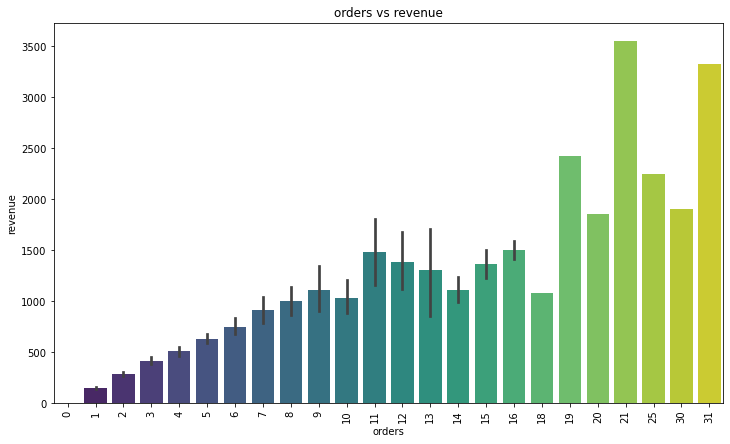

In [18]:
plt.figure(figsize=(12,7))
sns.barplot(df2['SATURDAY_ORDERS'],df2['SATURDAY_REVENUE'],palette='viridis')
plt.title('orders vs revenue')
plt.xlabel('orders')
plt.ylabel('revenue')
plt.xticks(rotation= 90)
plt.show()

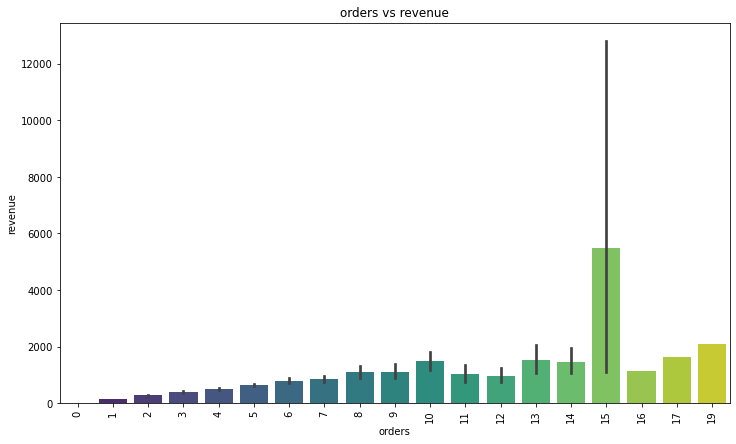

In [20]:
plt.figure(figsize=(12,7))
sns.barplot(df['MONDAY_ORDERS'],df['MONDAY_REVENUE'],palette='viridis')
plt.title('orders vs revenue')
plt.xlabel('orders')
plt.ylabel('revenue')
plt.xticks(rotation= 90)
plt.show()

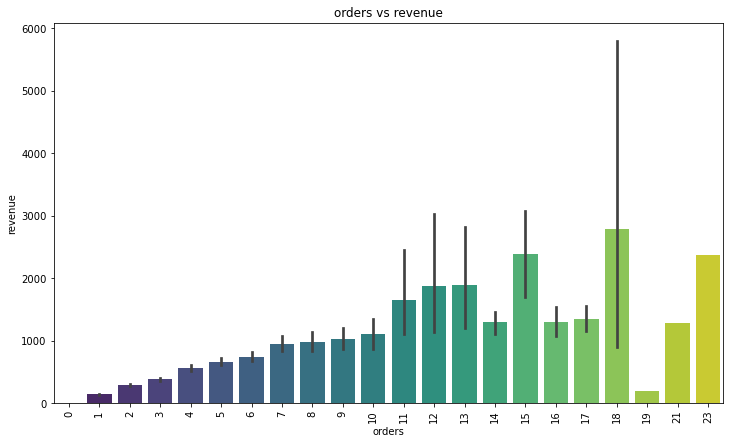

In [21]:
plt.figure(figsize=(12,7))
sns.barplot(df['TUESDAY_ORDERS'],df['TUESDAY_REVENUE'],palette='viridis')
plt.title('orders vs revenue')
plt.xlabel('orders')
plt.ylabel('revenue')
plt.xticks(rotation= 90)
plt.show()

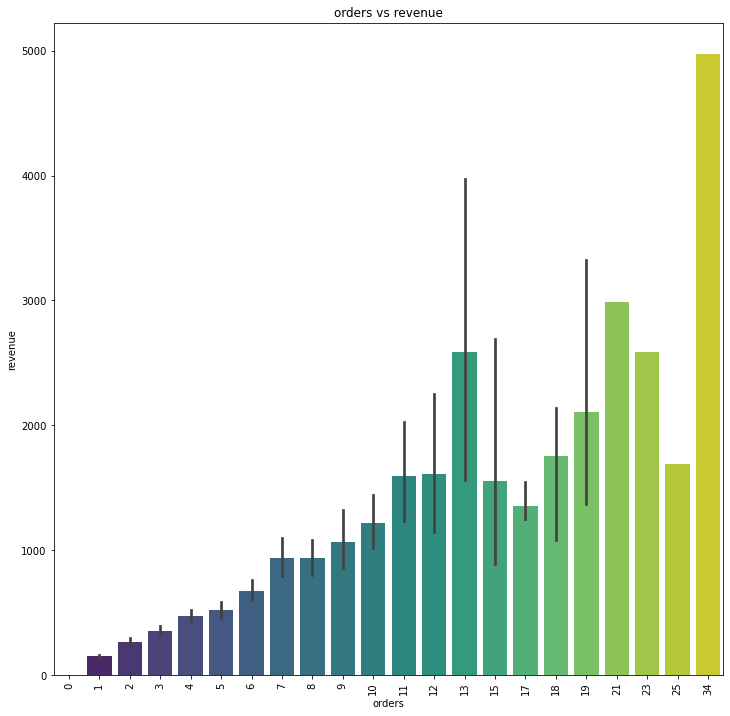

In [22]:
plt.figure(figsize=(12,12))
sns.barplot(df['TIME_0000_0600_ORDERS'],df['TIME_0000_0600_REVENUE'],palette='viridis')
plt.title('orders vs revenue')
plt.xlabel('orders')
plt.ylabel('revenue')
plt.xticks(rotation= 90)
plt.show()

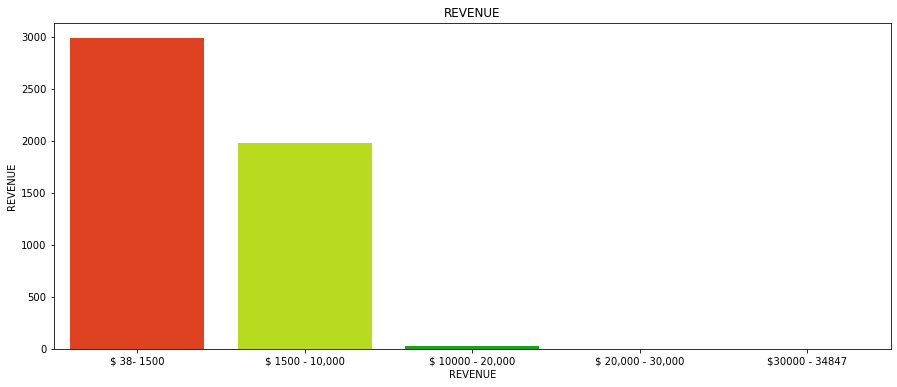

In [23]:
ai0_39 = df["REVENUE"][(df["REVENUE"] >= 38.5) & (df["REVENUE"] <= 1500)]
ai31_60 = df["REVENUE"][(df["REVENUE"] >= 1500) & (df["REVENUE"] <= 10000)]
ai61_90 = df["REVENUE"][(df["REVENUE"] >= 10000) & (df["REVENUE"] <= 20000)]
ai91_120 = df["REVENUE"][(df["REVENUE"] >=20000 ) & (df["REVENUE"] <= 30000)]
ai121_150 = df["REVENUE"][(df["REVENUE"] >= 30000) & (df["REVENUE"] <=34847 )]

aix = ["$ 38- 1500", "$ 1500 - 10,000", "$ 10000 - 20,000", "$ 20,000 - 30,000", "$30000 - 34847"]
aiy = [len(ai0_39.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="nipy_spectral_r")
plt.title("REVENUE")
plt.xlabel("REVENUE")
plt.ylabel("REVENUE")
plt.show()

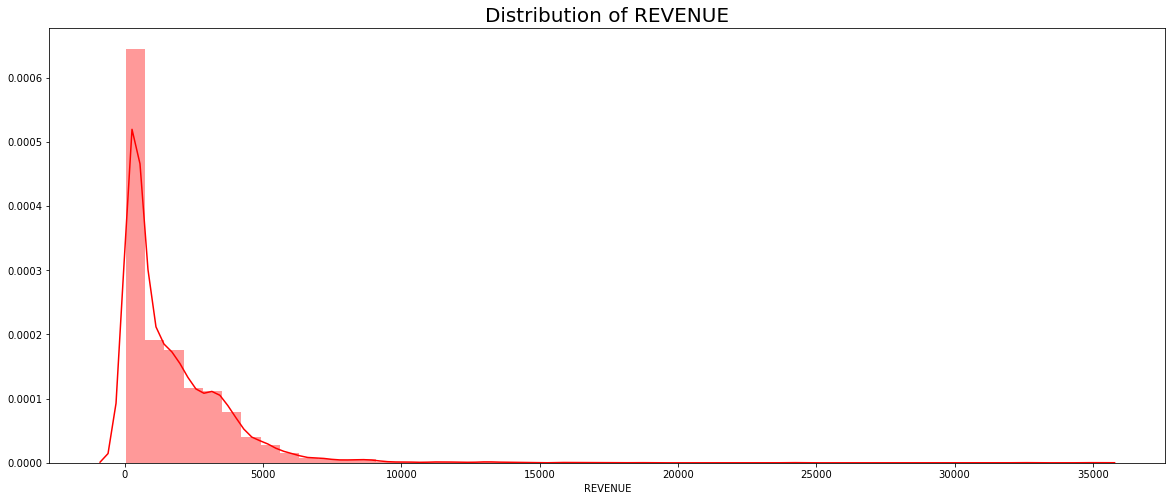

In [24]:
plt.rcParams['figure.figsize'] = (20,8)
sns.distplot(df['REVENUE'], color = 'red')
plt.title("Distribution of REVENUE", fontsize = 20)
plt.show()

In [ ]:
#working on customer segmentation by using k means on Revenue and Total_orders

In [25]:
x=df.iloc[:,[3,2]].values

In [26]:
print(x)

[[   96.67 11986.54]
 [  134.46 11025.96]
 [  168.83  7259.69]
 ...
 [  117.49   117.49]
 [  117.49   117.49]
 [   47.07    94.14]]


In [27]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

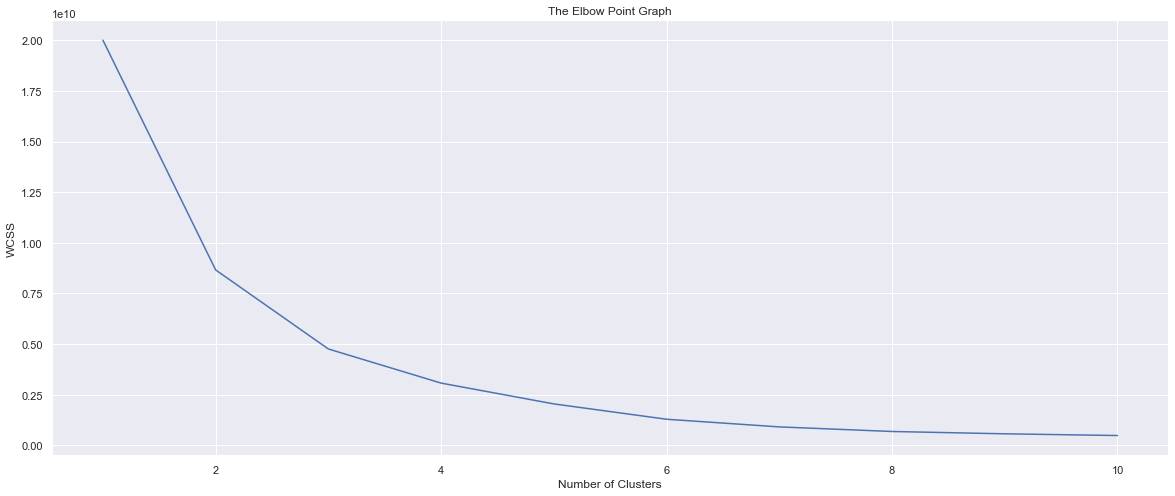

In [28]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
#from the above graph we are considering k as 3 
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)


Y = kmeans.fit_predict(x)

print(Y)

[2 2 2 ... 1 1 1]


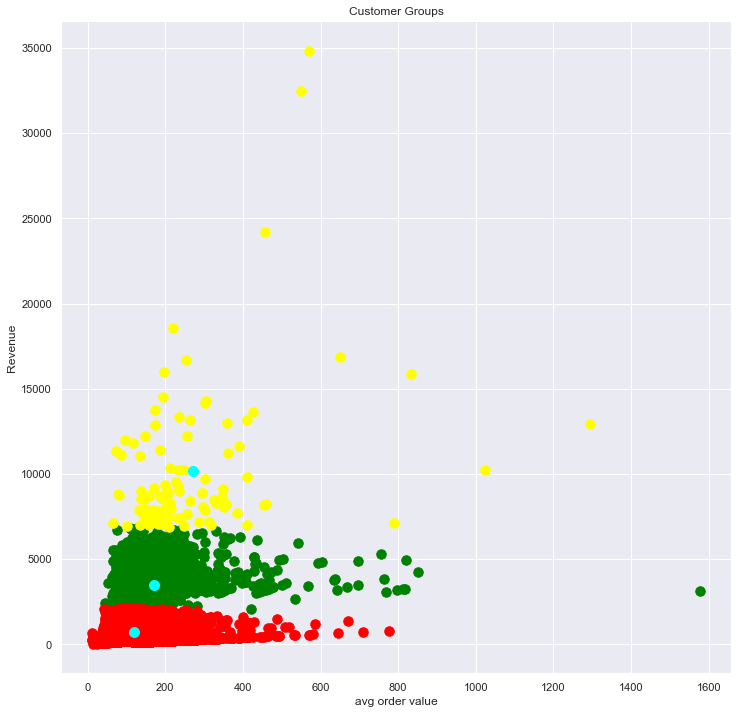

In [30]:
plt.figure(figsize=(12,12))
plt.scatter(x[Y==0,0], x[Y==0,1], s=90, c='green', label='Cluster 1')
plt.scatter(x[Y==1,0], x[Y==1,1], s=90, c='red', label='Cluster 2')
plt.scatter(x[Y==2,0], x[Y==2,1], s=90, c='yellow', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('avg order value')
plt.ylabel('Revenue')
plt.show()

In [32]:
#from the above graph we can visualise the 3 clusters and the revenue generated by the clusters the cluster 1 is placing more orders 
#we are using min max scaler to transform revenue and total_orders column in the range of 0 to 1 for better segmentation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['REVENUE']])
df['REVENUE'] = scaler.transform(df[['REVENUE']])

scaler.fit(df[['TOTAL_ORDERS']])
df['TOTAL_ORDERS'] = scaler.transform(df[['TOTAL_ORDERS']])

In [33]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['TOTAL_ORDERS','REVENUE']])
y_predicted

array([2, 2, 2, ..., 1, 1, 1])

In [34]:
df['cluster']=y_predicted
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,cluster
0,22,0.793548,0.343247,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44,2
1,29,0.522581,0.315651,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55,2
2,83,0.270968,0.207452,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80,2
3,95,0.277419,0.199770,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23,2
4,124,0.348387,0.178832,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50,2


In [35]:
km.cluster_centers_

array([[0.12788418, 0.07689396],
       [0.02177163, 0.01378555],
       [0.29836228, 0.19400476]])

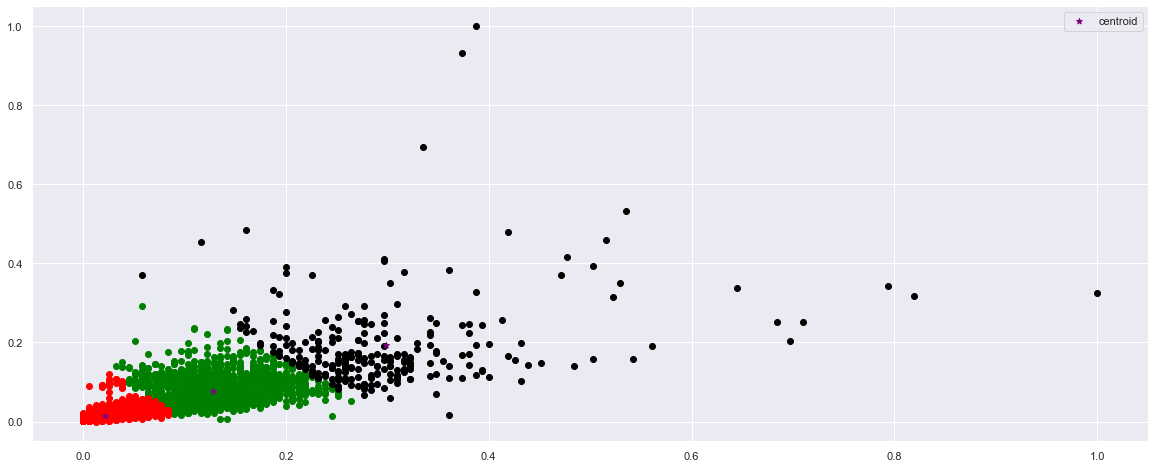

In [36]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.TOTAL_ORDERS,df1['REVENUE'],color='green')
plt.scatter(df2.TOTAL_ORDERS,df2['REVENUE'],color='red')
plt.scatter(df3.TOTAL_ORDERS,df3['REVENUE'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
Cluster 0 => need attention => Spend good money with us often and responsive to promotions.

Cluster 1 => champions => spent a good amount and bought more than once.

Cluster 2 => Potential customer=>buying high end products and generating more revenue

